In [5]:
#hide
#! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

In [6]:
from fastai.vision.all import *

In [7]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path
path.ls()

(#2) [Path('annotations'),Path('images')]

In [8]:
fname = (path/'images').ls()[0]
fname

Path('images/Abyssinian_1.jpg')

In [9]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [10]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [16]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\rainf\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\rainf\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

In [11]:
dls = pets.dataloaders(path/'images')

In [13]:
dls.train_ds[0]

(PILImage mode=RGB size=500x375, TensorCategory(30))

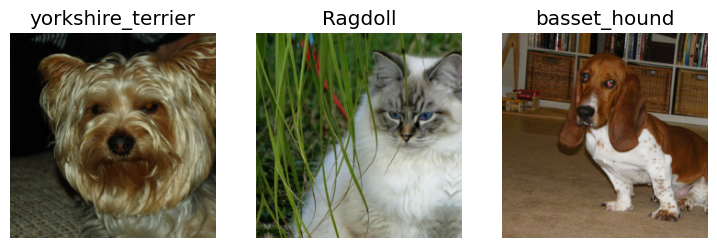

In [15]:
dls.show_batch(nrows=1, ncols=3)

In [17]:
#hide_output
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\rainf\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\rainf\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 375, 500])
	Item at index 1 has shape: torch.Size([3, 199, 300])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

In [18]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\rainf/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|█████████████████████████████████████████████████████████████| 83.3M/83.3M [00:07<00:00, 11.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.502985,0.322390,0.103518,01:40


epoch,train_loss,valid_loss,error_rate,time
0,0.516345,0.317372,0.099459,01:11
1,0.333020,0.212044,0.061570,01:11


In [19]:
x, y = dls.one_batch()

In [20]:
y

TensorCategory([ 8, 35, 18, 11,  2,  5,  4, 32,  9, 18,  2, 27, 17, 33, 15,  0, 33, 31, 15,  3, 24, 33,  0, 33,  7, 19,  3, 16, 31, 12, 10, 33, 11,  2, 27, 26, 20, 30, 24,  6, 36, 22, 30,  2, 26,  3,
                13, 10,  2,  6, 14,  6, 35, 13,  2,  1,  1, 14,  1, 17, 14,  5,  2, 14], device='cuda:0')

In [21]:
preds, _ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([2.2001e-03, 2.7872e-05, 6.6383e-04, 2.8203e-04, 1.0311e-03, 7.8968e-05, 4.3120e-04, 4.7690e-04, 9.9359e-01, 3.1194e-05, 3.3176e-05, 1.2292e-04, 5.6531e-05, 1.9073e-05, 2.0950e-06, 2.6097e-06,
        2.2504e-06, 5.8699e-05, 8.7264e-06, 1.8541e-05, 5.8770e-07, 8.5586e-06, 1.4323e-05, 3.7970e-05, 4.7388e-06, 7.4002e-06, 1.5650e-05, 1.8654e-06, 5.7835e-04, 1.2802e-05, 5.5678e-06, 8.6158e-05,
        1.2942e-05, 3.2471e-06, 8.9475e-07, 1.5584e-06, 6.5092e-05])

In [22]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

In [26]:
#hide
torch.random.manual_seed(42);

In [27]:
acts = torch.randn((6,2)) * 2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [28]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [29]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [30]:
def softmax(x):
    return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [32]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])